## **Load dependencies**

In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## **Load Dataset**

In [85]:
# Load MNIST dataset from Keras
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()


## **Normalize the Data**

In [86]:
x_train = x_train/255
x_test = x_test/255


x_train = x_train.reshape(-1 ,28*28)
x_test = x_test.reshape(-1 ,  28*28)



In [80]:
model = keras.Sequential([
 keras.layers.Dense(128, activation="relu", input_shape=(784,)), 
 keras.layers.Dense(10, activation="softmax")
])

In [88]:
y_train, y_test= keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)

In [94]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [95]:
histroy = model.fit(x_train , y_train , epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8760 - loss: 0.4341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9636 - loss: 0.1208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9770 - loss: 0.0771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0573
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9864 - loss: 0.0434
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9898 - loss: 0.0337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0257
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0240
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9947 - loss: 0.0177
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9953 - loss: 0.0163


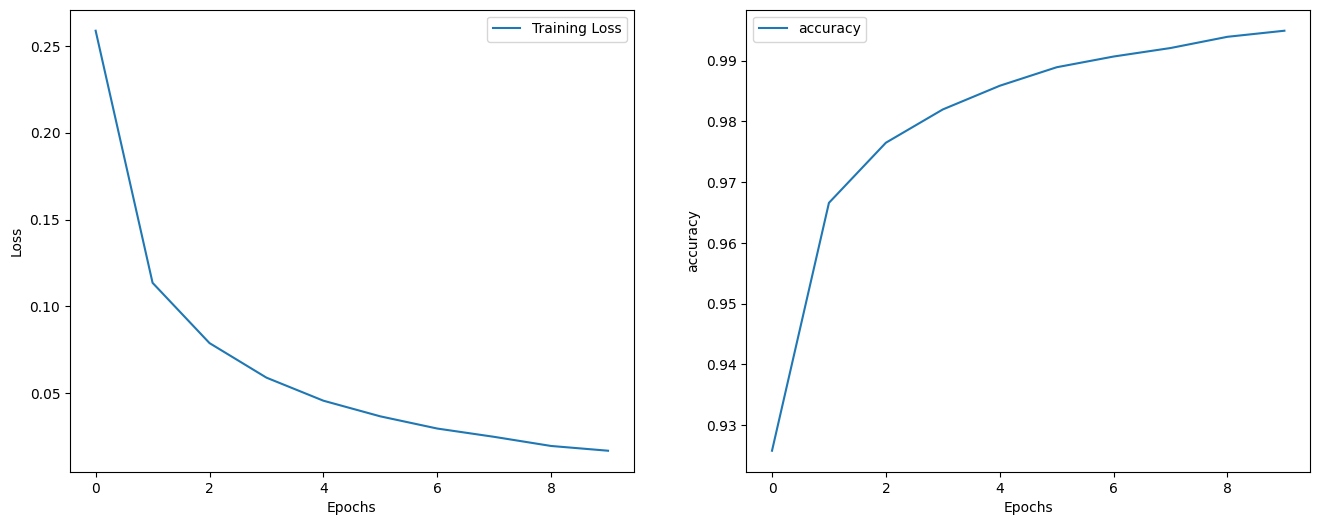

In [104]:
plt.figure(figsize=(16,6))
plt.subplot(1 ,2 ,1)
plt.plot(histroy.history['loss'] , label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1 ,2 ,2)
plt.plot(histroy.history['accuracy'] , label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()



In [107]:
test_loss , test_accuarcy = model.evaluate(x_test ,y_test , verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9789 - loss: 0.0767


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


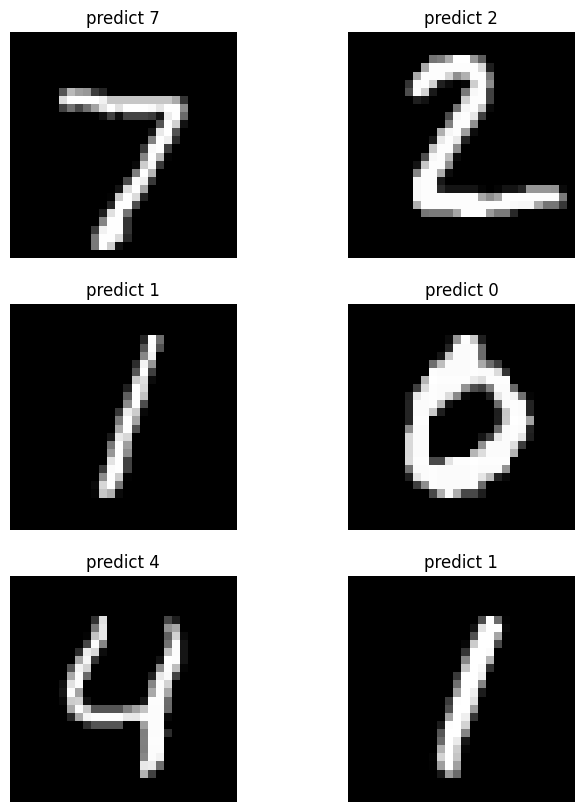

In [126]:
new_x_test= x_test[:6]
prediction = model.predict(new_x_test)
prediction_label = np.argmax(prediction , axis=1)
i=0
plt.figure(figsize=(8, 10))
for x in new_x_test : 
    plt.subplot(3 ,2 , i+1)
    plt.imshow(x.reshape(28 ,28) , cmap='gray')
    plt.title(f'predict {prediction_label[i]}')
    plt.axis('off')
    i+=1

plt.show()